In [1]:
import numpy as np
import matplotlib.pyplot as plt
import basicDeltaOperations as op
import seaborn as sns
import json
from scipy import stats

In [2]:
with open('120k_Data.json') as f:
    neg120k = json.load(f)

with open('EA_IRMS_Data.json') as f:
    EAData = json.load(f)

In [3]:
def compare13CDeltas(delta1, delta2):
    ratio1 = (delta1 / 1000 + 1) * 0.011118
    ratio2 = (delta2 / 1000 + 1) * 0.011118

    return 1000 * (ratio1 / ratio2 - 1)

Text(0, 0.5, 'Caltech Results $\\delta^{13C}_{PDB}$')

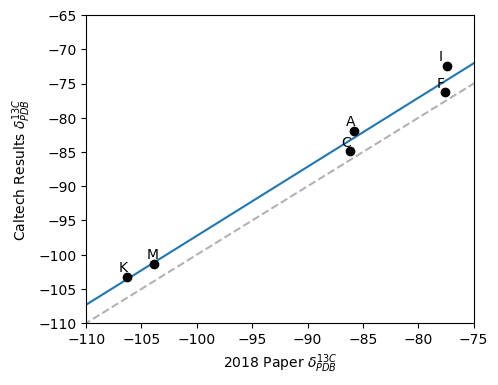

In [4]:
import matplotlib.pyplot as plt
import numpy as np
xs = []
ys = []
xerr = []
yerr = []

xDict = EAData['Moran et al']
yDict = EAData['Weighing 2023']
fig, ax = plt.subplots(figsize = (5,4), dpi =100)

for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
        xs.append(MPAData['13C/Unsub']['Delta VPDB'])
        xerr.append(MPAData['13C/Unsub']['Error'])
        ys.append(yDict[MPAKey]['13C/Unsub']['Delta VPDB'])
        yerr.append(yDict[MPAKey]['13C/Unsub']['Error'])

        ax.text(MPAData['13C/Unsub']['Delta VPDB'] -0.75, yDict[MPAKey]['13C/Unsub']['Delta VPDB'] + 0.75, MPAKey[-1])

ax.errorbar(xs, ys, xerr = xerr, yerr = yerr, fmt = 'o', c = 'k')


ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
ax.set_xlim(-110,-75)
ax.set_ylim(-110,-65)

coef = np.polyfit(xs,ys,1)
poly1d_fn = np.poly1d(coef) 

xLinePlot = (-200,100)

ax.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'tab:blue',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

ax.set_xlabel('2018 Paper $\delta^{13C}_{PDB}$')
ax.set_ylabel("Caltech Results $\delta^{13C}_{PDB}$")

Text(0, 0.5, 'Orbi-IRMS $\\delta^{13C}_{VPDB}$')

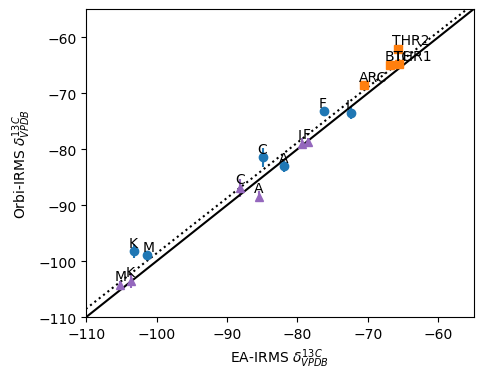

In [5]:
import matplotlib.pyplot as plt
import numpy as np
xs = []
ys = []
xerr = []
yerr = []

xDict = EAData['Solvent 2022']
yDict = neg120k
fig, ax = plt.subplots(figsize = (5,4), dpi =100)
expSamples = ['A','F','K','I','M','C']

for xIdx, xDict in enumerate([EAData['Solvent 2022'], EAData['Weighing 2023']]):
        for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
                if MPAKey not in ['SIG']:
                        deltaOrbi = yDict[MPAKey]['13C/Unsub']['Delta Mean']
                        deltaSigVPDB = op.deltaToRatio('13C',xDict['SIG']['13C/Unsub']['Delta VPDB'])
                        deltaOrbiR = (deltaOrbi / 1000 + 1) * deltaSigVPDB

                        deltaOrbiVPDB = op.ratioToDelta('13C',deltaOrbiR)

                        if MPAKey in expSamples:
                                fmt = 'o'
                                c = 'tab:blue'
                        else:
                                fmt = 's'
                                c = 'tab:orange'

                        if xIdx == 0:
                                fmt = '^'
                                c = 'tab:purple'

                        ax.errorbar(MPAData['13C/Unsub']['Delta VPDB'], deltaOrbiVPDB, xerr = MPAData['13C/Unsub']['Error'], yerr = yDict[MPAKey]['13C/Unsub']['ER'], fmt = fmt, c = c)

                        xs.append(MPAData['13C/Unsub']['Delta VPDB'])
                        xerr.append(MPAData['13C/Unsub']['Error'])
                        ys.append(deltaOrbiVPDB)
                        yerr.append(yDict[MPAKey]['13C/Unsub']['ER'])

                        ax.text(MPAData['13C/Unsub']['Delta VPDB'] -0.75,deltaOrbiVPDB + 0.75, MPAKey)


#ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
ax.set_xlim(-110,-55)
ax.set_ylim(-110,-55)

coef = np.polyfit(xs,ys,1)
poly1d_fn = np.poly1d(coef) 

xLinePlot = (-200,100)

ax.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
ax.plot([-200,100], [-200,100], color = 'k',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

ax.set_xlabel('EA-IRMS $\delta^{13C}_{VPDB}$')
ax.set_ylabel("Orbi-IRMS $\delta^{13C}_{VPDB}$")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


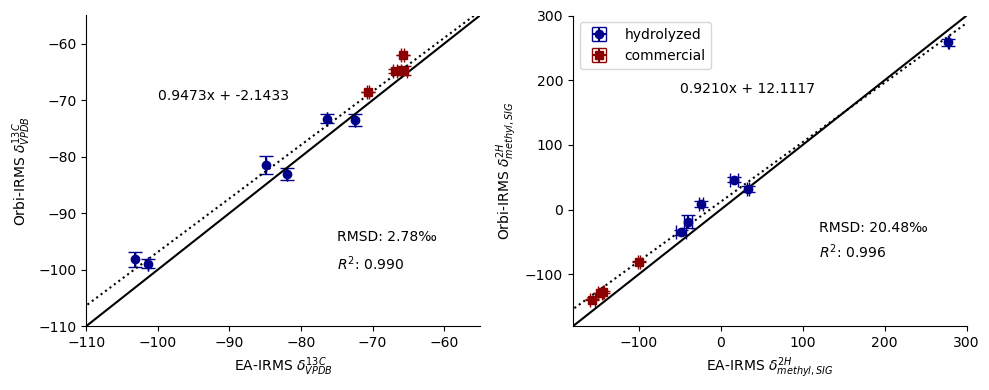

In [24]:
import matplotlib.pyplot as plt
import numpy as np
crossPlot = {}

xs = []
ys = []
xerr = []
yerr = []

xDict = EAData['Weighing 2023']
yDict = neg120k
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4), dpi =100)
expSamples = ['A','F','K','I','M','C']

cAx = axes[0]
for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
    if MPAKey not in ['SIG']:
        crossPlot[MPAKey] = {'13C':[],'13CErr':[],'2H':[],'2HErr':[]}
        deltaOrbi = yDict[MPAKey]['13C/Unsub']['Delta Mean']
        deltaSigVPDB = op.deltaToRatio('13C',xDict['SIG']['13C/Unsub']['Delta VPDB'])
        deltaOrbiR = (deltaOrbi / 1000 + 1) * deltaSigVPDB

        deltaOrbiVPDB = op.ratioToDelta('13C',deltaOrbiR)

        if MPAKey in expSamples:
                fmt = 'o'
                c = 'darkblue'
        else:
                fmt = 's'
                c = 'darkred'

        cAx.errorbar(MPAData['13C/Unsub']['Delta VPDB'], deltaOrbiVPDB, xerr = MPAData['13C/Unsub']['Error'], yerr = yDict[MPAKey]['13C/Unsub']['ER'], fmt = fmt, c = c)

        xs.append(MPAData['13C/Unsub']['Delta VPDB'])
        xerr.append(MPAData['13C/Unsub']['Error'])
        ys.append(deltaOrbiVPDB)
        yerr.append(yDict[MPAKey]['13C/Unsub']['ER'])

        crossPlot[MPAKey]['13C'] = deltaOrbiVPDB
        crossPlot[MPAKey]['13CErr'] = yDict[MPAKey]['13C/Unsub']['ER']

        #cAx.text(MPAData['13C/Unsub']['Delta VPDB'] -0.75,deltaOrbiVPDB + 0.75, MPAKey)

#ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
cAx.set_xlim(-110,-55)
cAx.set_ylim(-110,-55)

slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)
poly1d_fn = np.poly1d([slope, intercept]) 

xLinePlot = (-200,100)

cAx.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
cAx.plot([-200,100], [-200,100], color = 'k',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

serr = (np.array(ys) - np.array(xs))**2
RMSD = np.sqrt(serr.mean())
cAx.text(-75, -95, 'RMSD: ' + f'{RMSD:.2f}' + '‰')
cAx.text(-75, -100, '$R^{2}$: ' + f'{r_value:.3f}')

cAx.text(-100, -70, f'{slope:.4f}' + 'x + ' + f'{intercept:.4f}')

cAx.set_xlabel('EA-IRMS $\delta^{13C}_{VPDB}$')
cAx.set_ylabel("Orbi-IRMS $\delta^{13C}_{VPDB}$")

cAx = axes[1]
xDict = EAData['UNM 2023']
hxs = []
hxerr = []
hys = []
hyerr = []
for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
    if MPAKey not in ['SIG']:
        deltaOrbi = yDict[MPAKey]['D/Unsub']['Delta Mean']
        deltaOrbiErr = yDict[MPAKey]['D/Unsub']['ER']
        deltaOrbiScaled = 4/3 * deltaOrbi
        deltaOrbiErrScaled = 4/3 * deltaOrbiErr

        deltaEAVSMOW = xDict[MPAKey]['D/Unsub']['Delta VSMOW']
        deltaEAVSMOWErr = xDict[MPAKey]['D/Unsub']['Error']
        EAratio = op.deltaToRatio('D',deltaEAVSMOW)

        deltaSigVSMOW = xDict['SIG']['D/Unsub']['Delta VSMOW']
        SIGratio = op.deltaToRatio('D', deltaSigVSMOW)

        deltaEAvsSIG = 1000 * (EAratio / SIGratio - 1)
        deltaEAScaled = 5/3 * deltaEAvsSIG
        deltaEAErrScaled = 5/3 * deltaEAVSMOWErr

        if MPAKey in expSamples:
                fmt = 'o'
                c = 'darkblue'
                label = 'hydrolyzed'
        else:
                fmt = 's'
                c = 'darkred'
                label = 'commercial'

        cAx.errorbar(deltaEAScaled, deltaOrbiScaled, xerr = deltaEAErrScaled, yerr = deltaOrbiErrScaled, fmt = fmt, c = c, label = label)

        hxs.append(deltaEAScaled)
        hxerr.append(deltaEAErrScaled)
        hys.append(deltaOrbiScaled)
        hyerr.append(deltaOrbiErrScaled)

        crossPlot[MPAKey]['2H'] = deltaOrbiScaled
        crossPlot[MPAKey]['2HErr'] = deltaOrbiErrScaled

        #cAx.text(deltaEAScaled -0.75,deltaOrbiScaled + 0.75, MPAKey)

#ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
cAx.set_xlim(-180,300)
cAx.set_ylim(-180,300)

slope, intercept, r_value, p_value, std_err = stats.linregress(hxs, hys)
poly1d_fn = np.poly1d([slope, intercept]) 

xLinePlot = (-200,300)

cAx.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
cAx.plot([-200,300], [-200,300], color = 'k',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

serr = (np.array(hys) - np.array(hxs))**2
RMSD = np.sqrt(serr.mean())
cAx.text(120, -35, 'RMSD: ' + f'{RMSD:.2f}' + '‰')
cAx.text(120,-75, '$R^{2}$: ' + f'{r_value:.3f}')

cAx.text(-50, 180, f'{slope:.4f}' + 'x + ' + f'{intercept:.4f}')

cAx.set_xlabel('EA-IRMS $\delta^{2H}_{methyl, SIG}$')
cAx.set_ylabel("Orbi-IRMS $\delta^{2H}_{methyl, SIG}$")

handles, labels = cAx.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
cAx.legend(by_label.values(), by_label.keys())

plt.tight_layout()
sns.despine()

fig.savefig('Figure 3.eps')

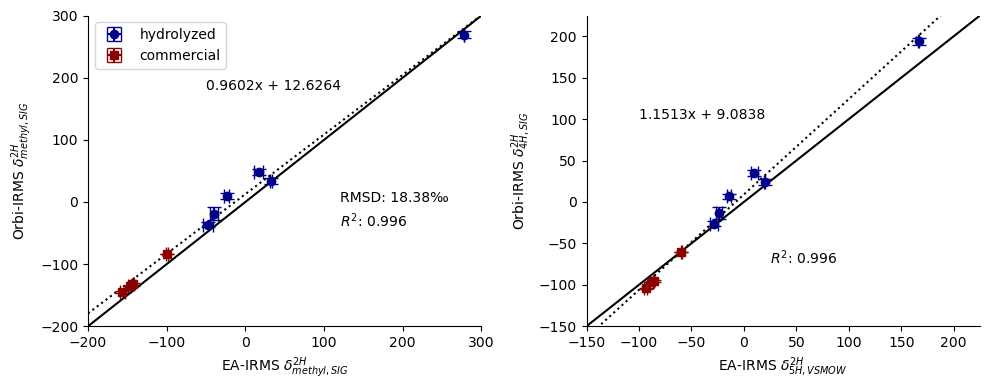

In [25]:
import matplotlib.pyplot as plt
import numpy as np
crossPlot = {}

xs = []
ys = []
xerr = []
yerr = []

xDict = EAData['UNM 2023']
yDict = neg120k
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4), dpi =100)
expSamples = ['A','F','K','I','M','C']

cAx = axes[1]
for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
    if MPAKey not in ['SIG']:
        deltaOrbi = yDict[MPAKey]['D/Unsub']['Delta Mean']
        deltaOrbiErr = yDict[MPAKey]['D/Unsub']['ER']
        deltaOrbiScaled = deltaOrbi
        deltaOrbiErrScaled = deltaOrbiErr

        deltaEAVSMOW = xDict[MPAKey]['D/Unsub']['Delta VSMOW']
        deltaEAVSMOWErr = xDict[MPAKey]['D/Unsub']['Error']
        EAratio = op.deltaToRatio('D',deltaEAVSMOW)

        deltaSigVSMOW = xDict['SIG']['D/Unsub']['Delta VSMOW']
        SIGratio = op.deltaToRatio('D', deltaSigVSMOW)

        deltaEAvsSIG = 1000 * (EAratio / SIGratio - 1)
        deltaEAScaled =  deltaEAvsSIG
        deltaEAErrScaled =  deltaEAVSMOWErr
        if MPAKey in expSamples:
                fmt = 'o'
                c = 'darkblue'
        else:
                fmt = 's'
                c = 'darkred'

        cAx.errorbar(deltaEAScaled, deltaOrbiScaled, xerr = deltaEAErrScaled, yerr = deltaOrbiErrScaled, fmt = fmt, c = c)

        xs.append(deltaEAScaled)
        xerr.append(deltaEAErrScaled)
        ys.append(deltaOrbiScaled)
        yerr.append(deltaOrbiErrScaled)

cAx.set_xlim(-150,225)
cAx.set_ylim(-150,225)

slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)
poly1d_fn = np.poly1d([slope, intercept]) 

xLinePlot = (-300,225)

cAx.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
cAx.plot([-300,225], [-300,225], color = 'k',linestyle = '-')

cAx.text(25, -75, '$R^{2}$: ' + f'{r_value:.3f}')
cAx.text(-100, 100, f'{slope:.4f}' + 'x + ' + f'{intercept:.4f}')

cAx.set_xlabel('EA-IRMS $\delta^{2H}_{5H, VSMOW}$')
cAx.set_ylabel("Orbi-IRMS $\delta^{2H}_{4H, SIG}$")

cAx = axes[0]
xDict = EAData['UNM 2023']
hxs = []
hxerr = []
hys = []
hyerr = []
for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
    if MPAKey not in ['SIG']:
        deltaOrbi = yDict[MPAKey]['D/Unsub']['Delta Mean']
        deltaOrbiErr = yDict[MPAKey]['D/Unsub']['ER']
        deltaOrbiScaled = 1.39 * deltaOrbi
        deltaOrbiErrScaled = 1.39 * deltaOrbiErr

        deltaEAVSMOW = xDict[MPAKey]['D/Unsub']['Delta VSMOW']
        deltaEAVSMOWErr = xDict[MPAKey]['D/Unsub']['Error']
        EAratio = op.deltaToRatio('D',deltaEAVSMOW)

        deltaSigVSMOW = xDict['SIG']['D/Unsub']['Delta VSMOW']
        SIGratio = op.deltaToRatio('D', deltaSigVSMOW)

        deltaEAvsSIG = 1000 * (EAratio / SIGratio - 1)
        deltaEAScaled = 5/3 * deltaEAvsSIG
        deltaEAErrScaled = 5/3 * deltaEAVSMOWErr

        if MPAKey in expSamples:
                fmt = 'o'
                c = 'darkblue'
                label = 'hydrolyzed'
        else:
                fmt = 's'
                c = 'darkred'
                label = 'commercial'

        cAx.errorbar(deltaEAScaled, deltaOrbiScaled, xerr = deltaEAErrScaled, yerr = deltaOrbiErrScaled, fmt = fmt, c = c, label = label)

        hxs.append(deltaEAScaled)
        hxerr.append(deltaEAErrScaled)
        hys.append(deltaOrbiScaled)
        hyerr.append(deltaOrbiErrScaled)

#ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
cAx.set_xlim(-200,300)
cAx.set_ylim(-200,300)

slope, intercept, r_value, p_value, std_err = stats.linregress(hxs, hys)
poly1d_fn = np.poly1d([slope, intercept]) 

xLinePlot = (-200,300)

cAx.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
cAx.plot([-200,300], [-200,300], color = 'k',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

serr = (np.array(hys) - np.array(hxs))**2
RMSD = np.sqrt(serr.mean())
cAx.text(120, 0, 'RMSD: ' + f'{RMSD:.2f}' + '‰')
cAx.text(120,-40, '$R^{2}$: ' + f'{r_value:.3f}')

cAx.text(-50, 180, f'{slope:.4f}' + 'x + ' + f'{intercept:.4f}')

handles, labels = cAx.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
cAx.legend(by_label.values(), by_label.keys())

cAx.set_xlabel('EA-IRMS $\delta^{2H}_{methyl, SIG}$')
cAx.set_ylabel("Orbi-IRMS $\delta^{2H}_{methyl, SIG}$")

plt.tight_layout()
sns.despine()

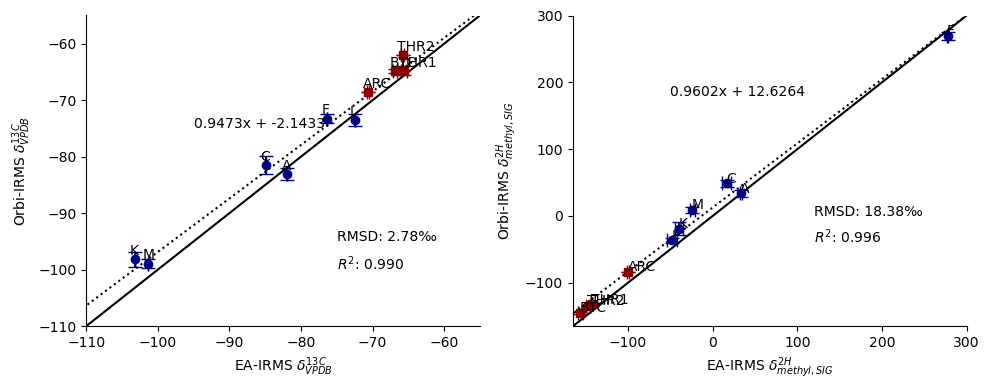

In [20]:
import matplotlib.pyplot as plt
import numpy as np
crossPlot = {}

xs = []
ys = []
xerr = []
yerr = []

xDict = EAData['Weighing 2023']
yDict = neg120k
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4), dpi =100)
expSamples = ['A','F','K','I','M','C']

cAx = axes[0]
for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
    if MPAKey not in ['SIG']:
        crossPlot[MPAKey] = {'13C':[],'13CErr':[],'2H':[],'2HErr':[]}
        deltaOrbi = yDict[MPAKey]['13C/Unsub']['Delta Mean']
        deltaSigVPDB = op.deltaToRatio('13C',xDict['SIG']['13C/Unsub']['Delta VPDB'])
        deltaOrbiR = (deltaOrbi / 1000 + 1) * deltaSigVPDB

        deltaOrbiVPDB = op.ratioToDelta('13C',deltaOrbiR)

        if MPAKey in expSamples:
                fmt = 'o'
                c = 'darkblue'
        else:
                fmt = 's'
                c = 'darkred'

        cAx.errorbar(MPAData['13C/Unsub']['Delta VPDB'], deltaOrbiVPDB, xerr = MPAData['13C/Unsub']['Error'], yerr = yDict[MPAKey]['13C/Unsub']['ER'], fmt = fmt, c = c)

        xs.append(MPAData['13C/Unsub']['Delta VPDB'])
        xerr.append(MPAData['13C/Unsub']['Error'])
        ys.append(deltaOrbiVPDB)
        yerr.append(yDict[MPAKey]['13C/Unsub']['ER'])

        crossPlot[MPAKey]['13C'] = deltaOrbiVPDB
        crossPlot[MPAKey]['13CErr'] = yDict[MPAKey]['13C/Unsub']['ER']

        cAx.text(MPAData['13C/Unsub']['Delta VPDB'] -0.75,deltaOrbiVPDB + 0.75, MPAKey)

#ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
cAx.set_xlim(-110,-55)
cAx.set_ylim(-110,-55)

slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)
poly1d_fn = np.poly1d([slope, intercept]) 

xLinePlot = (-200,100)

cAx.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
cAx.plot([-200,100], [-200,100], color = 'k',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

serr = (np.array(ys) - np.array(xs))**2
RMSD = np.sqrt(serr.mean())
cAx.text(-75, -95, 'RMSD: ' + f'{RMSD:.2f}' + '‰')
cAx.text(-75, -100, '$R^{2}$: ' + f'{r_value:.3f}')

cAx.text(-95, -75, f'{slope:.4f}' + 'x + ' + f'{intercept:.4f}')

cAx.set_xlabel('EA-IRMS $\delta^{13C}_{VPDB}$')
cAx.set_ylabel("Orbi-IRMS $\delta^{13C}_{VPDB}$")

cAx = axes[1]
xDict = EAData['UNM 2023']
hxs = []
hxerr = []
hys = []
hyerr = []
for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
    if MPAKey not in ['SIG']:
        deltaOrbi = yDict[MPAKey]['D/Unsub']['Delta Mean']
        deltaOrbiErr = yDict[MPAKey]['D/Unsub']['ER']
        deltaOrbiScaled = 1.39 * deltaOrbi
        deltaOrbiErrScaled = 1.39 * deltaOrbiErr

        deltaEAVSMOW = xDict[MPAKey]['D/Unsub']['Delta VSMOW']
        deltaEAVSMOWErr = xDict[MPAKey]['D/Unsub']['Error']
        EAratio = op.deltaToRatio('D',deltaEAVSMOW)

        deltaSigVSMOW = xDict['SIG']['D/Unsub']['Delta VSMOW']
        SIGratio = op.deltaToRatio('D', deltaSigVSMOW)

        deltaEAvsSIG = 1000 * (EAratio / SIGratio - 1)
        deltaEAScaled = 5/3 * deltaEAvsSIG
        deltaEAErrScaled = 5/3 * deltaEAVSMOWErr

        if MPAKey in expSamples:
                fmt = 'o'
                c = 'darkblue'
        else:
                fmt = 's'
                c = 'darkred'

        cAx.errorbar(deltaEAScaled, deltaOrbiScaled, xerr = deltaEAErrScaled, yerr = deltaOrbiErrScaled, fmt = fmt, c = c)

        hxs.append(deltaEAScaled)
        hxerr.append(deltaEAErrScaled)
        hys.append(deltaOrbiScaled)
        hyerr.append(deltaOrbiErrScaled)

        cAx.text(deltaEAScaled -0.75,deltaOrbiScaled + 0.75, MPAKey)

#ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
cAx.set_xlim(-165,300)
cAx.set_ylim(-165,300)

slope, intercept, r_value, p_value, std_err = stats.linregress(hxs, hys)
poly1d_fn = np.poly1d([slope, intercept]) 

xLinePlot = (-200,300)

cAx.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
cAx.plot([-200,300], [-200,300], color = 'k',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

serr = (np.array(hys) - np.array(hxs))**2
RMSD = np.sqrt(serr.mean())
cAx.text(120, 0, 'RMSD: ' + f'{RMSD:.2f}' + '‰')
cAx.text(120,-40, '$R^{2}$: ' + f'{r_value:.3f}')

cAx.text(-50, 180, f'{slope:.4f}' + 'x + ' + f'{intercept:.4f}')

cAx.set_xlabel('EA-IRMS $\delta^{2H}_{methyl, SIG}$')
cAx.set_ylabel("Orbi-IRMS $\delta^{2H}_{methyl, SIG}$")

plt.tight_layout()
sns.despine()

In [8]:
EAData['UNM 2023']['SIG']

{'D/Unsub': {'Delta VSMOW': -159.4, 'Error': 2.6}}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


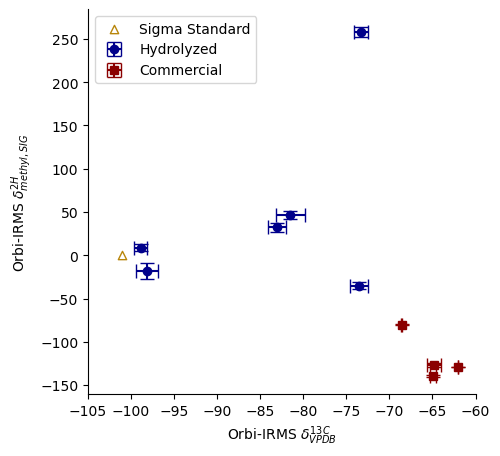

In [19]:
import matplotlib
matplotlib.rcParams.update({'errorbar.capsize': 5})

fig, ax = plt.subplots(figsize = (5,5))

for MPAKey, MPAData in crossPlot.items():
    if MPAKey in expSamples:
        fmt = 'o'
        c = 'darkblue'
        label = 'Hydrolyzed'
    else:
        fmt = 's'
        c = 'darkred'
        label = 'Commercial'

    ax.errorbar(MPAData['13C'],MPAData['2H'], xerr = MPAData['13CErr'],yerr = MPAData['2HErr'], mfc = c, fmt = fmt, mec = c, ecolor = c, capsize = 5, label = label)

    #ax.text(MPAData['13C']+1, MPAData['2H']+5, MPAKey)

c = 'darkgoldenrod'
#ax.errorbar(EAData['Weighing 2023']['SIG']['13C/Unsub']['Delta VPDB'], 0, xerr = EAData['Weighing 2023']['SIG']['13C/Unsub']['Error'], yerr = 0, mfc = 'w', mec = c, ecolor = c, label = "Sigma Standard", fmt = '^', capsize = 0,markeredgewidth = 1)
ax.scatter(EAData['Weighing 2023']['SIG']['13C/Unsub']['Delta VPDB'], 0, facecolor = 'w', edgecolor = c, label = "Sigma Standard", marker = '^')
    
sns.despine()

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

ax.set_xlabel("Orbi-IRMS $\delta^{13C}_{VPDB}$")
ax.set_ylabel("Orbi-IRMS $\delta^{2H}_{methyl, SIG}$")
ax.set_xlim(-105,-60)

fig.savefig("Figure 4.eps", bbox_inches = 'tight')